In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
import os
#import missingno as msno
import math
from pathlib import Path

from dash import Dash, html, dcc
import plotly.express as px

#from pandas_profiling import ProfileReport

In [2]:
src_file = os.path.join('flights.csv')
#image_dir = ('images')

In [3]:

df = pd.read_csv(src_file)
df.head(5)


id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0  2013      1    1     517.0             515        2.0     830.0   
1   1  2013      1    1     533.0             529        4.0     850.0   
2   2  2013      1    1     542.0             540        2.0     923.0   
3   3  2013      1    1     544.0             545       -1.0    1004.0   
4   4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay  ... flight  tailnum origin dest air_time  \
0             819       11.0  ...   1545   N14228    EWR  IAH    227.0   
1             830       20.0  ...   1714   N24211    LGA  IAH    227.0   
2             850       33.0  ...   1141   N619AA    JFK  MIA    160.0   
3            1022      -18.0  ...    725   N804JB    JFK  BQN    183.0   
4             837      -25.0  ...    461   N668DN    LGA  ATL    116.0   

   distance  hour  minute            time_hour                    name  
0      1400     5      15  2013-01-01 05:00:00   United Air Lines Inc.  
1      1416     5      29  2013-01-01 05:00:00   United Air Lines Inc.  
2      1089     5      40  2013-01-01 05:00:00  American Airlines Inc.  
3      1576     5      45  2013-01-01 05:00:00         JetBlue Airways  
4       762     6       0  2013-01-01 06:00:00    Delta Air Lines Inc.  

[5 rows x 21 columns]

In [4]:
summary_stats = df.describe()
summary_stats.T

count           mean           std     min       25%  \
id              336776.0  168387.500000  97219.001466     0.0  84193.75   
year            336776.0    2013.000000      0.000000  2013.0   2013.00   
month           336776.0       6.548510      3.414457     1.0      4.00   
day             336776.0      15.710787      8.768607     1.0      8.00   
dep_time        328521.0    1349.109947    488.281791     1.0    907.00   
sched_dep_time  336776.0    1344.254840    467.335756   106.0    906.00   
dep_delay       328521.0      12.639070     40.210061   -43.0     -5.00   
arr_time        328063.0    1502.054999    533.264132     1.0   1104.00   
sched_arr_time  336776.0    1536.380220    497.457142     1.0   1124.00   
arr_delay       327346.0       6.895377     44.633292   -86.0    -17.00   
flight          336776.0    1971.923620   1632.471938     1.0    553.00   
air_time        327346.0     150.686460     93.688305    20.0     82.00   
distance        336776.0    1039.912604    733.233033    17.0    502.00   
hour            336776.0      13.180247      4.661316     1.0      9.00   
minute          336776.0      26.230100     19.300846     0.0      8.00   

                     50%        75%       max  
id              168387.5  252581.25  336775.0  
year              2013.0    2013.00    2013.0  
month                7.0      10.00      12.0  
day                 16.0      23.00      31.0  
dep_time          1401.0    1744.00    2400.0  
sched_dep_time    1359.0    1729.00    2359.0  
dep_delay           -2.0      11.00    1301.0  
arr_time          1535.0    1940.00    2400.0  
sched_arr_time    1556.0    1945.00    2359.0  
arr_delay           -5.0      14.00    1272.0  
flight            1496.0    3465.00    8500.0  
air_time           129.0     192.00     695.0  
distance           872.0    1389.00    4983.0  
hour                13.0      17.00      23.0  
minute              29.0      44.00      59.0

# Data Prepration

In [5]:
df["date"] = df['date'] = pd.to_datetime(df[['year','month','day']])
#data["date"] =data["date"].astype('category')
df.head(1)

id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0  2013      1    1     517.0             515        2.0     830.0   

   sched_arr_time  arr_delay  ... tailnum  origin dest air_time distance  \
0             819       11.0  ...  N14228     EWR  IAH    227.0     1400   

   hour  minute            time_hour                   name       date  
0     5      15  2013-01-01 05:00:00  United Air Lines Inc. 2013-01-01  

[1 rows x 22 columns]

In [6]:
#msno.matrix(df)

In [7]:
dfnull = df.isnull()

In [8]:
missing_values_count = df.isnull().sum()
missing_values_count

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
date                 0
dtype: int64

In [9]:
df["cancelled"] = np.where(((df["dep_time"].isnull()) & (df["arr_time"].isnull())), 1, 0)

#data["cancelled"] =data["cancelled"].astype('category')
df.head(1)

id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0  2013      1    1     517.0             515        2.0     830.0   

   sched_arr_time  arr_delay  ... origin  dest air_time distance hour  minute  \
0             819       11.0  ...    EWR   IAH    227.0     1400    5      15   

             time_hour                   name       date cancelled  
0  2013-01-01 05:00:00  United Air Lines Inc. 2013-01-01         0  

[1 rows x 23 columns]

In [10]:
df = df.dropna(axis=0,subset=['dep_time','dep_delay'])
df2=df.copy()

In [11]:
missing_values_count = df.isnull().sum()
missing_values_count

id                   0
year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time           458
sched_arr_time       0
arr_delay         1175
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time          1175
distance             0
hour                 0
minute               0
time_hour            0
name                 0
date                 0
cancelled            0
dtype: int64

In [12]:
df2[df2["id"]==332143]



id  year  month  day  dep_time  sched_dep_time  dep_delay  \
332143  332143  2013      9   25    2052.0            2045        7.0   

        arr_time  sched_arr_time  arr_delay  ... origin  dest air_time  \
332143     332.0              53        NaN  ...    JFK   SJU      NaN   

       distance hour  minute            time_hour                  name  \
332143     1598   20      45  2013-09-25 20:00:00  Delta Air Lines Inc.   

             date cancelled  
332143 2013-09-25         0  

[1 rows x 23 columns]

In [13]:
df.loc[((df["dep_time"].isnull()) & (df["cancelled"] == 0)), :]

Empty DataFrame
Columns: [id, year, month, day, dep_time, sched_dep_time, dep_delay, arr_time, sched_arr_time, arr_delay, carrier, flight, tailnum, origin, dest, air_time, distance, hour, minute, time_hour, name, date, cancelled]
Index: []

[0 rows x 23 columns]

In [14]:
#selected_columns = ['dep_time', 'arr_time','cancelled']
df.loc[((df["arr_time"].notnull()) & ( df["arr_delay"].isnull()))].head(3)


id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
471  471  2013      1    1    1525.0            1530       -5.0    1934.0   
477  477  2013      1    1    1528.0            1459       29.0    2002.0   
615  615  2013      1    1    1740.0            1745       -5.0    2158.0   

     sched_arr_time  arr_delay  ... origin  dest air_time distance hour  \
471            1805        NaN  ...    LGA   XNA      NaN     1147   15   
477            1647        NaN  ...    EWR   STL      NaN      872   14   
615            2020        NaN  ...    LGA   XNA      NaN     1147   17   

     minute            time_hour                      name       date  \
471      30  2013-01-01 15:00:00                 Envoy Air 2013-01-01   
477      59  2013-01-01 14:00:00  ExpressJet Airlines Inc. 2013-01-01   
615      45  2013-01-01 17:00:00                 Envoy Air 2013-01-01   

    cancelled  
471         0  
477         0  
615         0  

[3 rows x 23 columns]

In [15]:
def time_validation(hours):
    num_hours=hours
    minutes=num_hours%100
    print(num_hours,minutes)
    if(minutes>59):
        hours=(num_hours - minutes)
        hours+=100
        #print('in if:', hours)
        if(hours>=2400):hours=hours-2400
        #print('in 2400:',hours)
        hours=hours+(minutes-60)
        #print('in hours+:',hours)
    else:
        if(hours>=2400):
            hours=hours-2400
            #print('in hours>24:',hours)
    return str(hours)


In [16]:
def time_to_minutes(time_float):
    time_int = int(time_float)
    hours, minutes = divmod(time_int, 100)
    total_minutes = hours * 60 + minutes
    return total_minutes

In [17]:
from datetime import datetime, timedelta

def diff_in_minutes(time1, time2 ):
    # Compute the time difference in seconds
    #td1 = timedelta(hours=int(time1 // 100), minutes=int(time1 % 100))
    
    #td2 = timedelta(hours=int(time2 // 100), minutes=int(time2 % 100))
    
    td1 = time_to_minutes(time1)
    td2 = time_to_minutes(time2)
        
  
    dif = td1 - td2
    print( td1,td2)
    #dif= (td1 - td2).total_seconds()//60
    print(dif)
    # Account for overnight flights
   
    if (dif <0) :    
        dif = (td1+(24*60)-td2)
   

    return dif #,(td1 - td2) , (td1 - td2).seconds , type((td1 - td2).seconds)

In [18]:
def minutes_to_float_time(total_minutes):
    # Convert total number of minutes to hours and minutes
    hours, minutes = divmod(total_minutes, 60)

    # Combine hours and minutes into a single float value in hh.mm format
    time_float = float(f"{int(hours):02d}{int(minutes):02d}")

    # Return the result
    return time_float

In [19]:
# Fill all arr_delay NULL values by subtracting arr_time - sched_arr_time

df['arr_time'] = pd.to_numeric(df['arr_time'], errors='coerce')

arr_time_nan=df[df["arr_time"].isnull()].copy()

arr_time_nan.loc[:,'arr_time'] = arr_time_nan.apply(lambda row : minutes_to_float_time( time_to_minutes(row['sched_arr_time']) +row['dep_delay']) , axis = 1) 


df.loc[df["arr_time"].isnull(), 'arr_time'] = arr_time_nan['arr_time']

df['arr_time'] = pd.to_numeric(df['arr_time'], errors='coerce')

pd.to_numeric(df['arr_time'], errors='coerce')



0          830.0
1          850.0
2          923.0
3         1004.0
4          812.0
           ...  
336765    2334.0
336766    2347.0
336767    2345.0
336768    2359.0
336769     325.0
Name: arr_time, Length: 328521, dtype: float64

In [20]:
# Fill all arr_delay NULL values by subtracting arr_time - sched_arr_time
df['arr_delay'] = pd.to_numeric(df['arr_delay'], errors='coerce')

arr_delay_nan=df[df["arr_delay"].isnull()].copy()


arr_delay_nan.loc[:,'arr_delay'] = arr_delay_nan.apply(lambda row : diff_in_minutes(row['arr_time'], row['sched_arr_time']), axis = 1) 
df.loc[df["arr_delay"].isnull(), 'arr_delay'] = arr_delay_nan['arr_delay']

df['arr_delay'] = pd.to_numeric(df['arr_delay'], errors='coerce')

pd.to_numeric(df['arr_delay'], errors='coerce')
#pd.to_numeric(df['arr_delay'], errors='coerce').isnull().sum()
#df[((df["arr_time"]>0) & ( df["arr_delay"].isnull()))].head(3)

#df[df["arr_delay"].isnull()]


1174 1085
89
1202 1007
195
1318 1220
98
1371 1263
108
29 1311
-1282
1438 1327
111
1386 1340
46
793 645
148
885 706
179
1413 1311
102
1355 1178
177
1439 1386
53
1435 1439
-4
49 33
16
921 760
161
1101 988
113
1407 1246
161
19 1289
-1270
1271 1246
25
1343 1297
46
74 1395
-1321
795 680
115
921 827
94
1225 1165
60
535 535
0
1265 1246
19
24 1365
-1341
1439 1437
2
912 918
-6
1124 943
181
837 765
72
966 920
46
1210 1092
118
1152 845
307
1270 1117
153
58 1339
-1281
138 1354
-1216
70 30
40
980 816
164
1310 1246
64
1410 1340
70
627 630
-3
54 1246
-1192
1419 1250
169
1326 1238
88
1413 1351
62
869 801
68
1177 1001
176
1315 1240
75
1328 1238
90
990 830
160
2 1310
-1308
723 577
146
1287 1246
41
1420 1290
130
984 630
354
993 706
287
1095 860
235
821 765
56
956 871
85
1249 1018
231
971 979
-8
989 997
-8
1377 1250
127
1300 1165
135
1307 1087
220
1045 926
119
850 644
206
57 1353
-1296
1093 920
173
1135 940
195
1147 950
197
1081 965
116
1258 1055
203
1148 1005
143
1176 999
177
1159 1165
-6
804 574
230
111

0         11.0
1         20.0
2         33.0
3        -18.0
4        -25.0
          ... 
336765   -17.0
336766   -20.0
336767   -16.0
336768     1.0
336769   -25.0
Name: arr_delay, Length: 328521, dtype: float64

In [21]:
# Fill all air_time NULL values by subtracting arr_time - dep_time by
#multiplying with 65% percent of complete duration.

df['air_time'] = pd.to_numeric(df['air_time'], errors='coerce')
air_time_nan=df[df["air_time"].isnull()].copy()
air_time_nan.loc[:,'air_time'] = air_time_nan['arr_time']-air_time_nan['dep_time']
air_time_nan.loc[: , 'air_time'] = air_time_nan.apply(lambda row : diff_in_minutes(row['arr_time'],row["dep_time"]), axis = 1) 
df.loc[df["air_time"].isnull(), 'air_time'] = air_time_nan['air_time']

df['air_time'] = pd.to_numeric(df['air_time'], errors='coerce')

pd.to_numeric(df['air_time'], errors='coerce')



1174 925
249
1202 928
274
1318 1060
258
1371 1087
284
29 1179
-1150
1438 1192
246
1386 1216
170
793 545
248
885 685
200
1413 1128
285
1355 1129
226
1439 1167
272
1435 1241
194
49 1305
-1256
921 625
296
1101 828
273
1407 1144
263
19 1168
-1149
1271 1015
256
1343 1135
208
74 1325
-1251
795 546
249
921 679
242
1225 972
253
535 375
160
1265 1018
247
24 1121
-1097
1439 1242
197
912 824
88
1124 873
251
837 557
280
966 721
245
1210 913
297
1152 802
350
1270 1147
123
58 1242
-1184
138 1315
-1177
70 1359
-1289
980 689
291
1310 1018
292
1410 1170
240
627 517
110
54 1206
-1152
1419 1038
381
1326 1052
274
1413 1233
180
869 605
264
1177 904
273
1315 1044
271
1328 1070
258
990 522
468
2 1195
-1193
723 376
347
1287 1018
269
1420 1225
195
984 404
580
993 509
484
1095 660
435
821 560
261
956 734
222
1249 884
365
971 892
79
989 897
92
1377 1044
333
1300 1049
251
1307 1210
97
1045 855
190
850 561
289
57 1301
-1244
1093 719
374
1135 754
381
1147 762
385
1081 769
312
1258 864
394
1148 891
257
1176 912
264


0         227.0
1         227.0
2         160.0
3         183.0
4         116.0
          ...  
336765     41.0
336766     52.0
336767     47.0
336768     33.0
336769    196.0
Name: air_time, Length: 328521, dtype: float64

In [22]:
missing_values_count = df.isnull().sum()
missing_values_count



id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
date              0
cancelled         0
dtype: int64

In [23]:

df["speed"]=((df["distance"]/df["air_time"])*60)




In [24]:
df[df["speed"]<0]

Empty DataFrame
Columns: [id, year, month, day, dep_time, sched_dep_time, dep_delay, arr_time, sched_arr_time, arr_delay, carrier, flight, tailnum, origin, dest, air_time, distance, hour, minute, time_hour, name, date, cancelled, speed]
Index: []

[0 rows x 24 columns]

# Reports

## Numerical Distributions
### Histogram ,Boxplot, KDE and  Violon Plpt of each numerical column

In [25]:

def histogram(num_df):
    fig = plt.figure(figsize=(20, 40))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
    plt.suptitle("Distributions", fontsize=18, y=0.99)

    for n, col in enumerate(num_df.columns):
        # Create three subplots
        fig, (ax1, ax2, ax3 ,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

        # Plot histogram on ax1
        ax1.hist(num_df[col], bins=100)
        ax1.set(title='Number of flights by ' + col,
                xlabel=num_df.columns[n],
                ylabel='Number of flights')

        # Plot box plot on ax2
        ax2.boxplot(num_df[col], labels=[col], vert=False, showfliers=True  ,showmeans=True)
        ax2.set(title='Box Plot for ' + col,
                        xlabel=num_df.columns[n] ,ylabel='Density')

        # Plot KDE plot on ax3
        sns.kdeplot(num_df[col], ax=ax3 ,warn_singular=False)
        ax3.set(title='Kernel Density Estimate for ' + col,
                xlabel=num_df.columns[n],
                ylabel='Density')
        
        v = sns.violinplot(x=num_df[col], ax=ax4 )
        ax4.set(title='Violin Plot for ' + col,
                xlabel=num_df.columns[n],
                ylabel='Density' )
        
        plt.show()
        

        

In [26]:
num_df = df.select_dtypes(include=['float' , 'int'])

continuous_df = num_df[[ 'sched_dep_time','dep_time', 'dep_delay','sched_arr_time', 'arr_time',  'arr_delay', 'air_time', 'speed' , 'distance']].copy()

<Figure size 2000x4000 with 0 Axes>

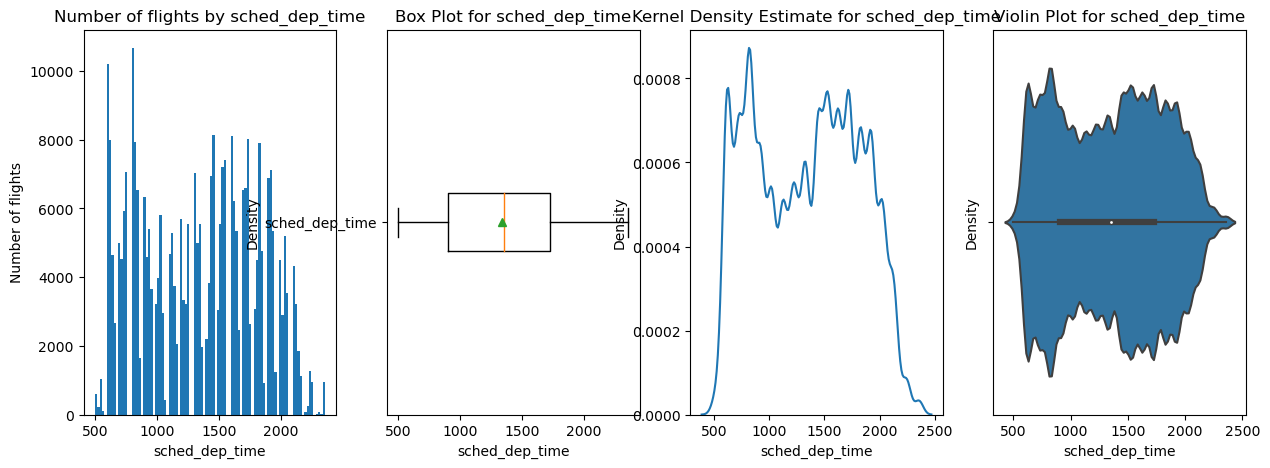

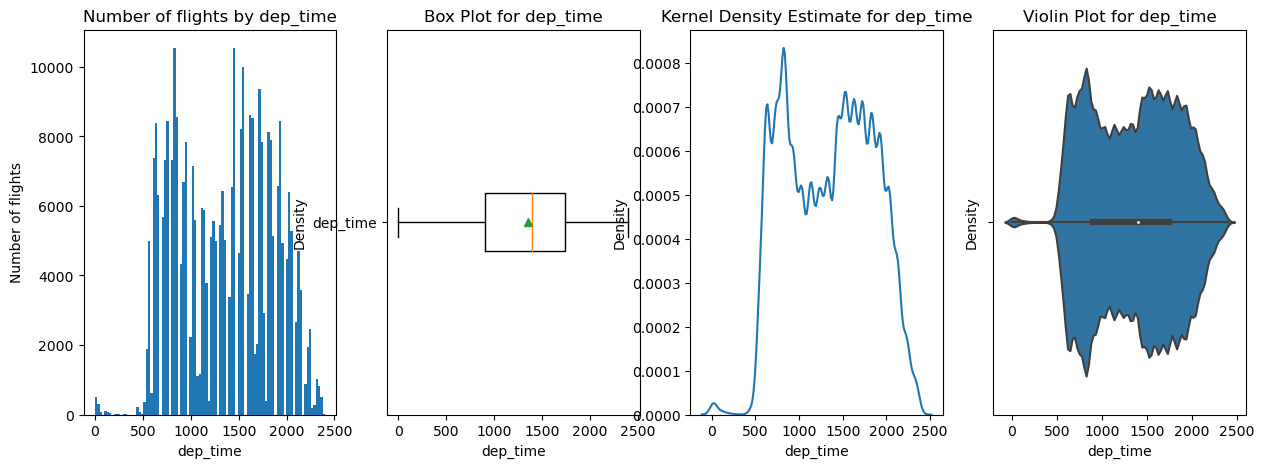

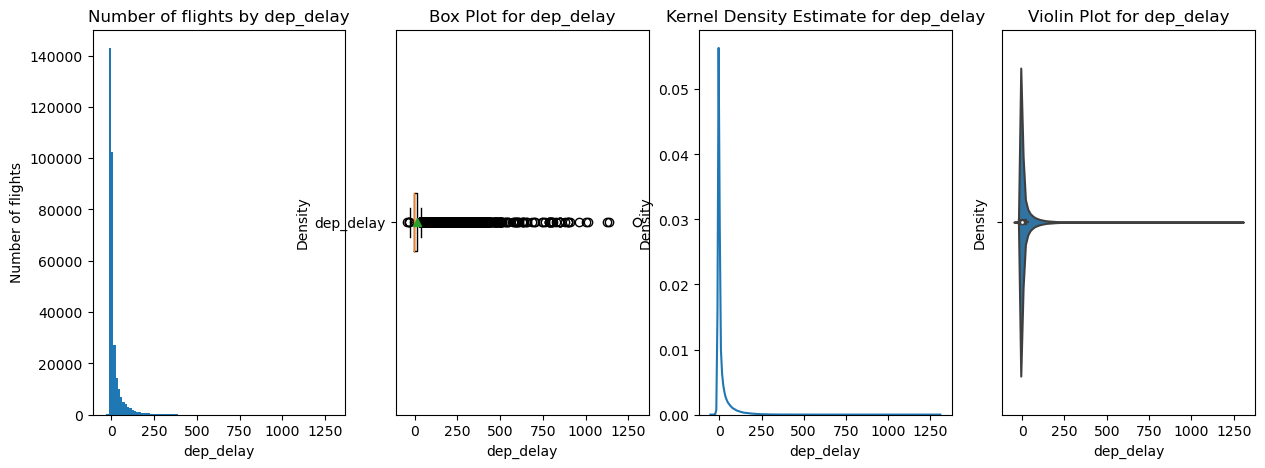

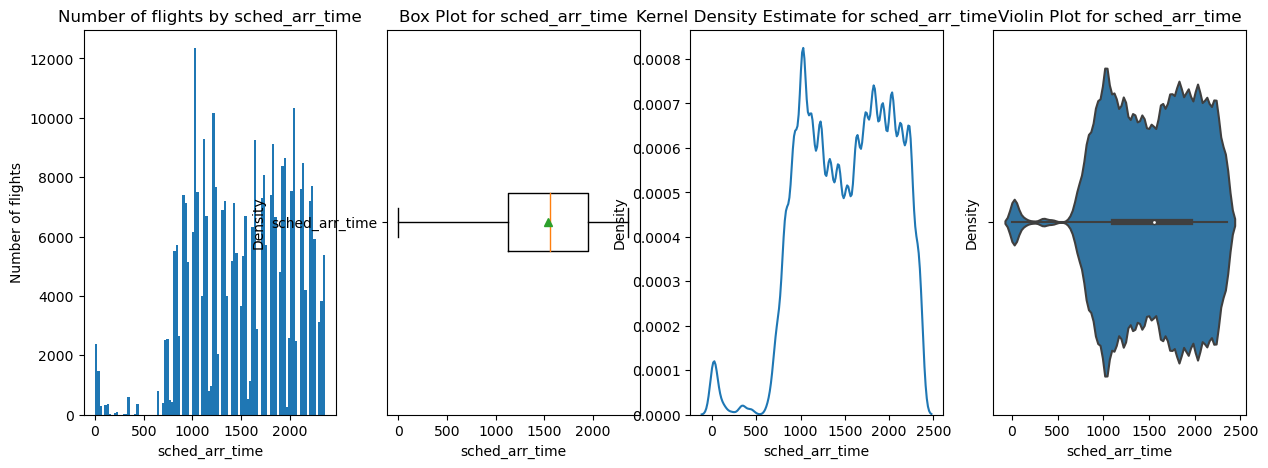

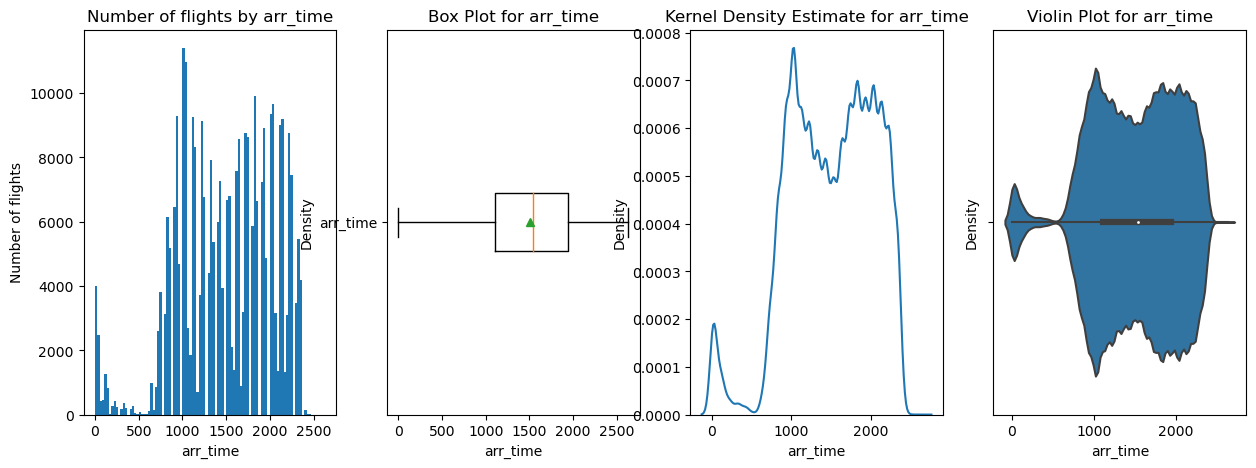

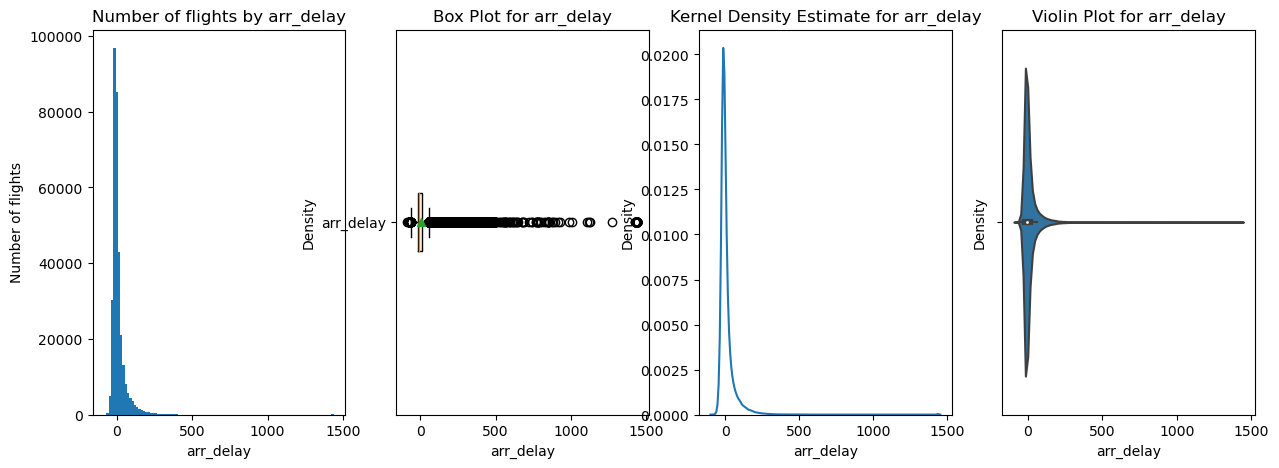

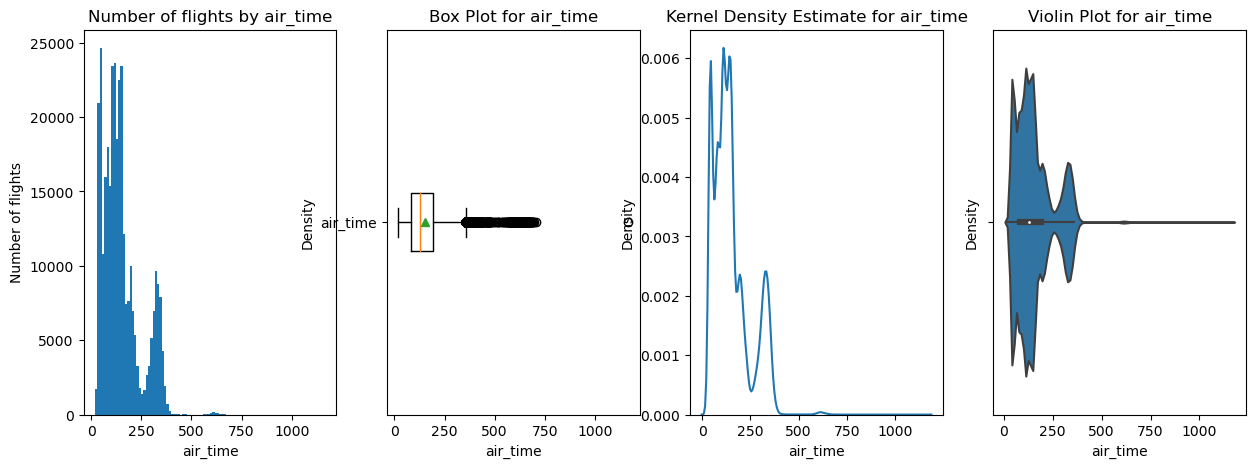

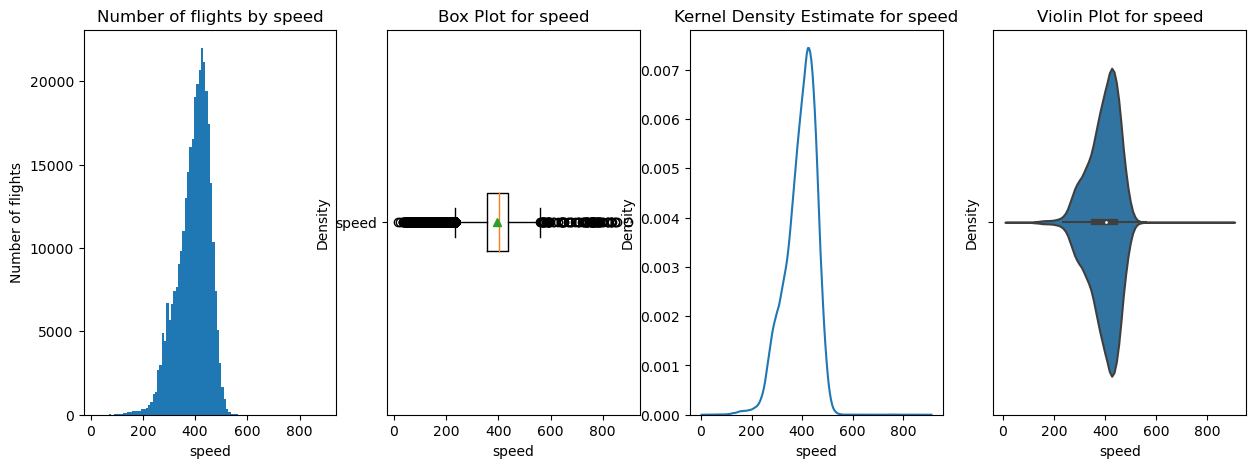

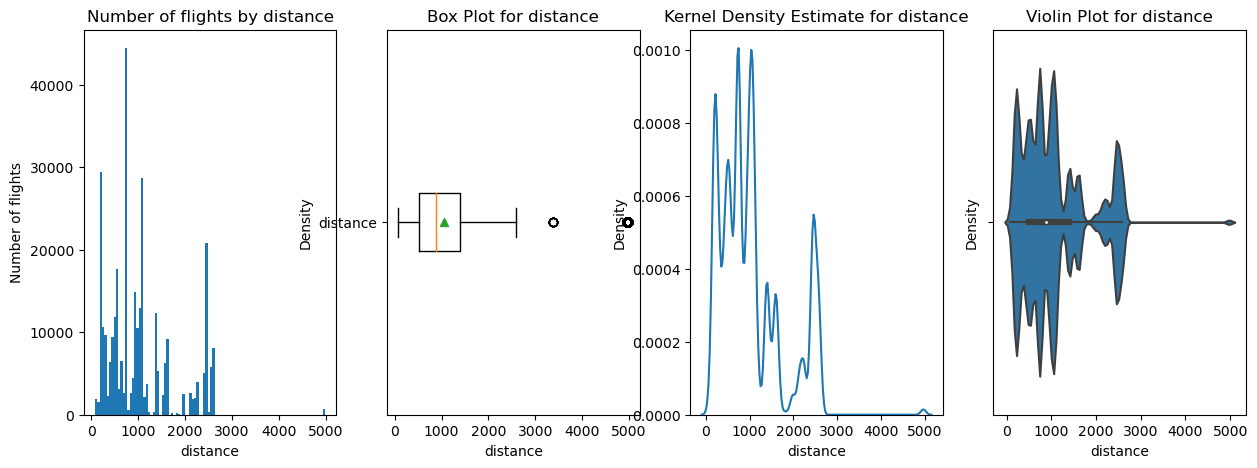

In [27]:
histogram(continuous_df);


<div style = "direction : rtl ;">

</br>    
تاخیر پرواز های در شروع حرکت  رسیدن به  مقصد کشیدگی به سمت راست دارند   
</br>
تعداد پرواز ها با تأخیر کمتر از 15 دقیقه دبیشتر است و دارای توزیع نرمال  نیست هر چه تأخیر طولانی تر می شود تعداد پرواز ها کمتر شده است
</br>
توزیع سرعت پرواز ها تقریبات نرمال است
</br>
 نیمی از پرواز ها با سرعت بین 350 تا 450 انجام شده است بر اساس داده های باکس پلات متغیر سرعت 
</br>

</br>

</br>

</br>
    
</div>

<Axes: ylabel='Density'>

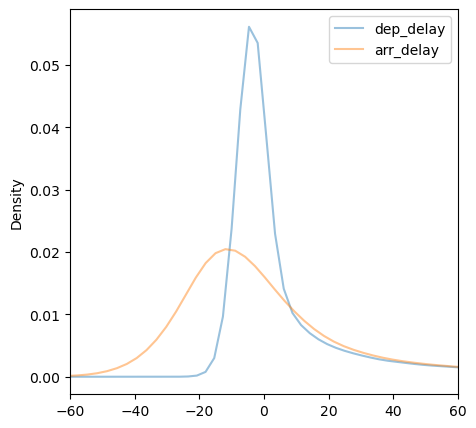

In [28]:
df[['dep_delay','arr_delay']].plot(kind='kde', alpha=0.45, xlim=(-60,60), figsize = (5,5))

توزیع تاخیر و تأجیل  در مقصد در بازه یک ساعته نرمال است 

## Categorical Distribution 
### Pie and Bar Plot for each columnd

In [29]:
import seaborn as sns

def cat_dist(cat_df):
    fig = plt.figure(figsize=(20, 40))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.suptitle("Distributions", fontsize=18, y=0.99)
    
    # Define a color palette for the plots
   
    colors = sns.color_palette("pastel", n_colors=31)
    for n, col in enumerate(cat_df.columns):
        # Create two subplots
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

        # Plot pie chart on ax1
        cat_df[col].value_counts().head(10).sort_values(ascending=False).plot.pie(
            autopct='%1.2f%%', ax=ax1, shadow=False, colors=colors)
        ax1.set(title='Percentage of Flights from ' + col,
                ylabel='')

        
        # Create countplot for frequency distribution of flights from each destination
        sns.barplot(x=cat_df[col].value_counts().head(31).index, 
                    y=cat_df[col].value_counts().head(31).values, ax=ax2, palette=colors )
        ax2.set(title='mean Distribution of Flights from ' + col,
                ylabel='Flight Destination' )
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


     
        
        plt.tight_layout()

        # Display the plots
        plt.show()

<Figure size 2000x4000 with 0 Axes>

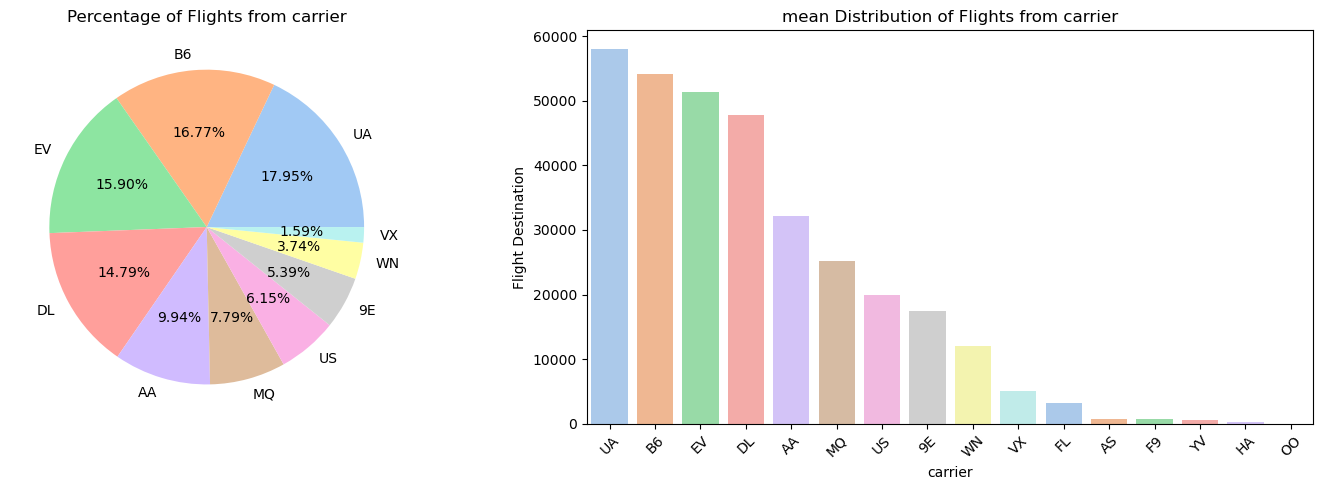

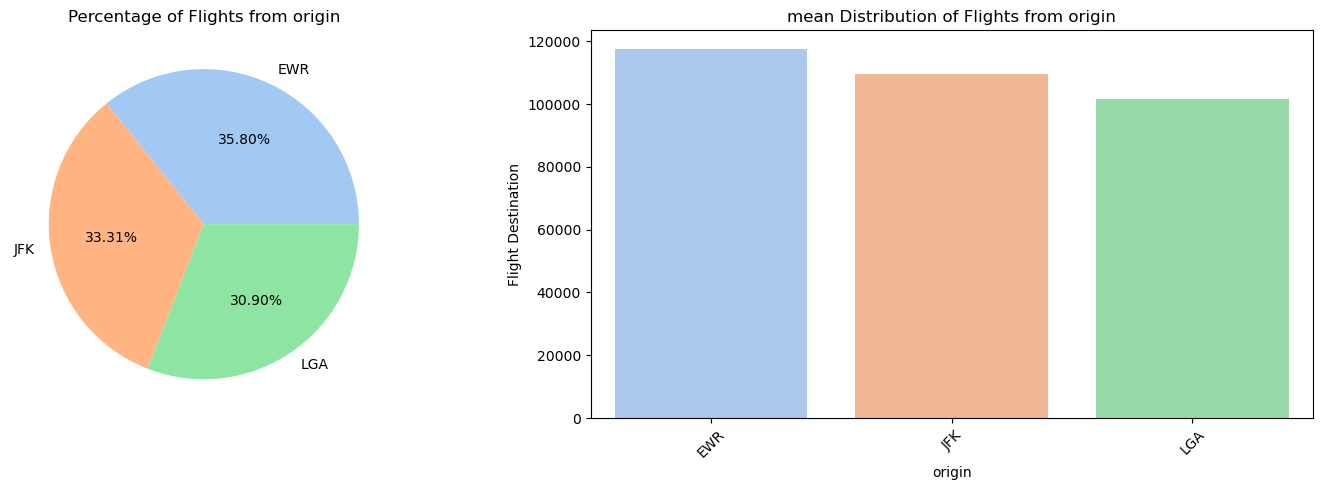

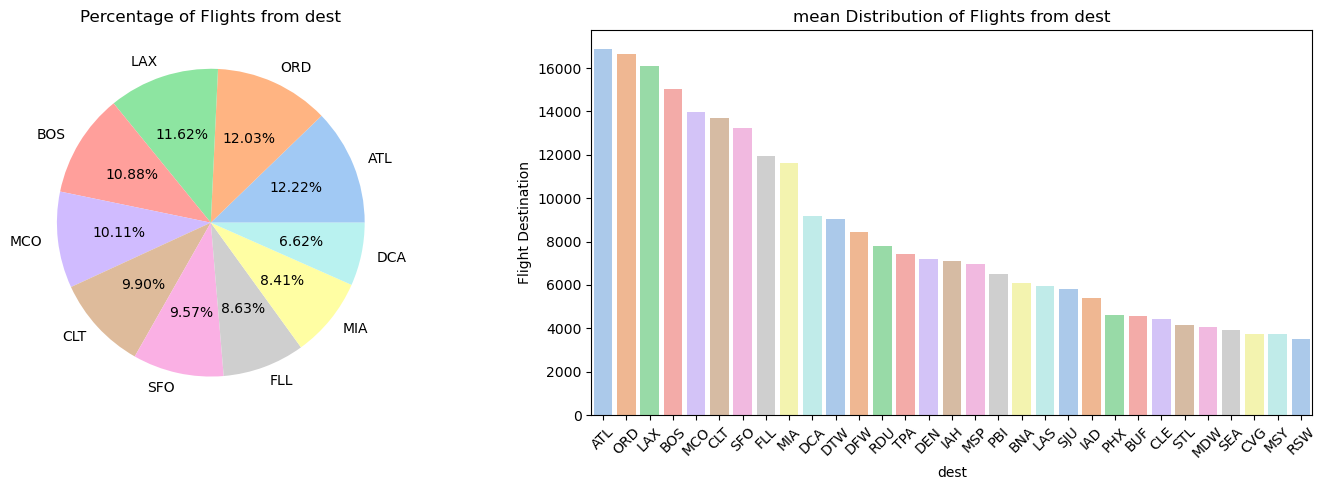

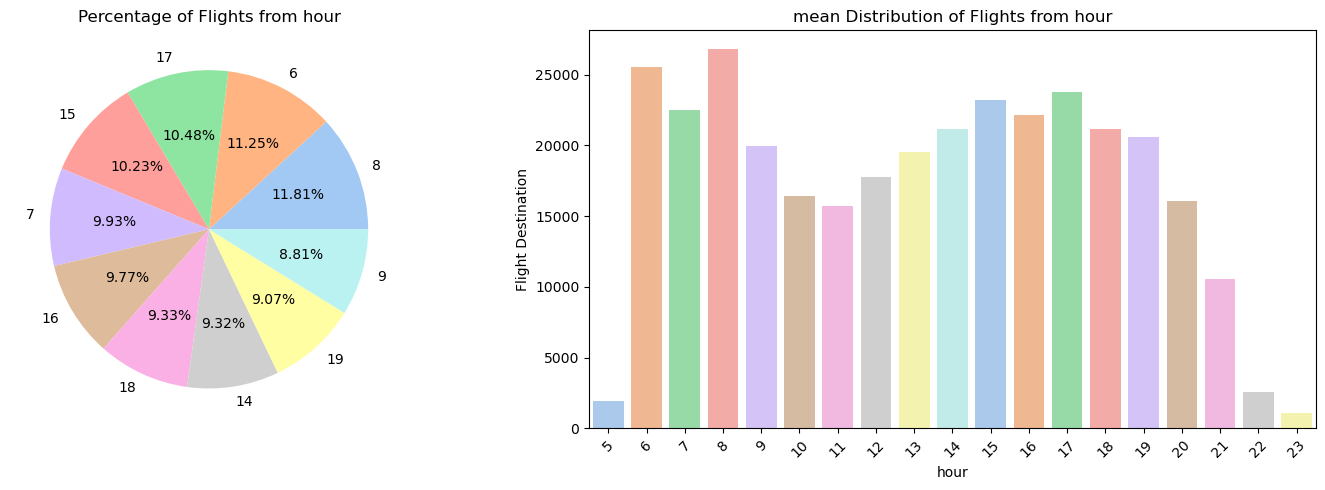

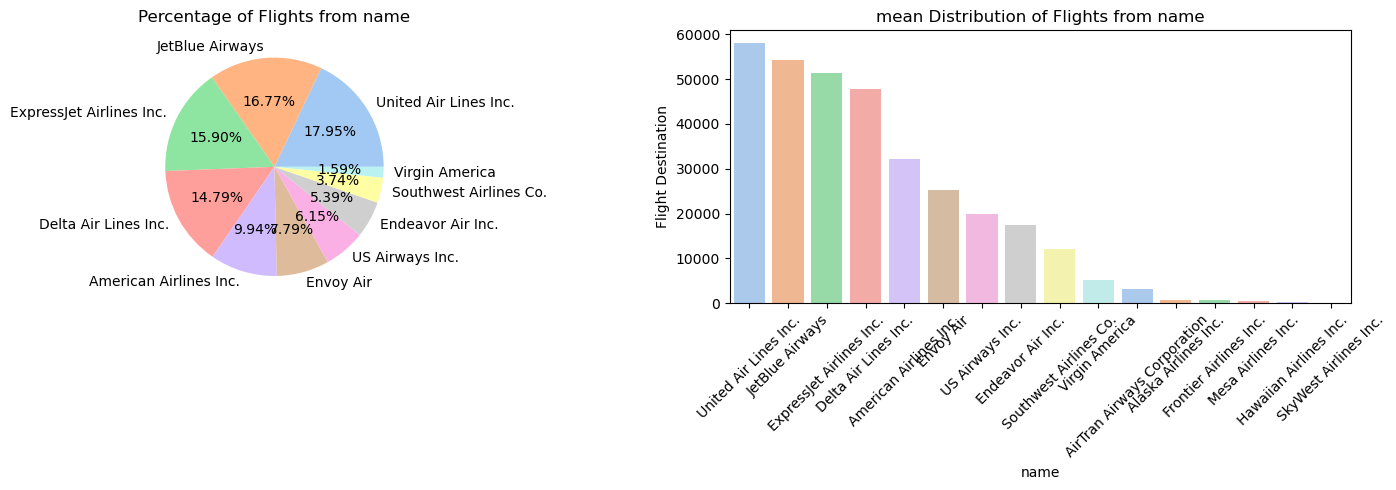

In [30]:

cat_df = df[['year', 'month', 'day', 'carrier', 'origin', 'dest', 'hour', 'name']].copy()

cat_dist(cat_df)


<div style = "direction : rtl ;">
carrier UA بیشترین حجم پرواز ها را داراست
</br>    
بیشترین پروازها به مقصد ATL است 
</br>    
بیشترین تعداد پروازها در ساعت 8 صبح با 11.81 درصد می باشد     
</br>
سه airline با بیشترین تعداد پرواز به ترتیب :
</br>
"United Air Lines Inc." با 17.95 درصد 
</br>
"JetBlue Airways Air Lines Inc." با 16.77 درصد 
</br>
"Express Air Lines Inc." با 15.90 درصد 
</div>



## Distribution By origin , top 10 destination 

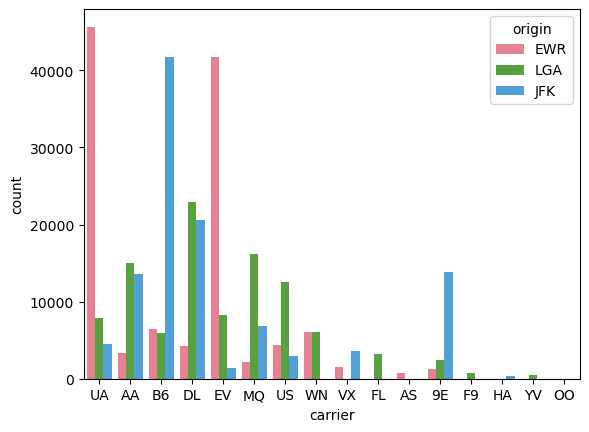

In [31]:
sns.countplot (data=df , x="carrier" , hue="origin" , palette="husl");


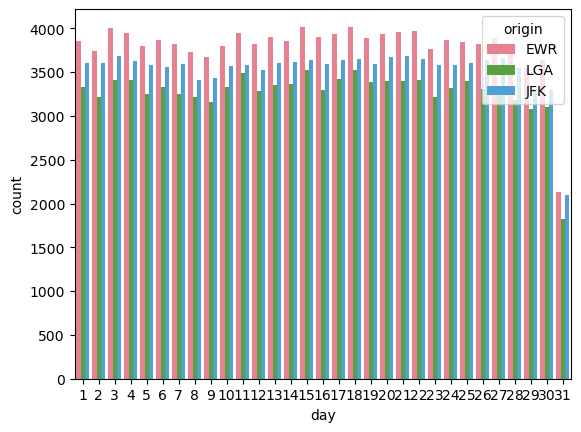

In [32]:
sns.countplot (data=df , x="day" ,hue = "origin" , palette="husl");


In [33]:
avg_by_month = df.groupby(['month']).agg({'dep_delay': 'mean', 
                          'arr_delay': 'mean'})

sum_by_month = df.groupby(['month']).agg({'dep_delay': 'sum', 
                          'arr_delay': 'sum'})

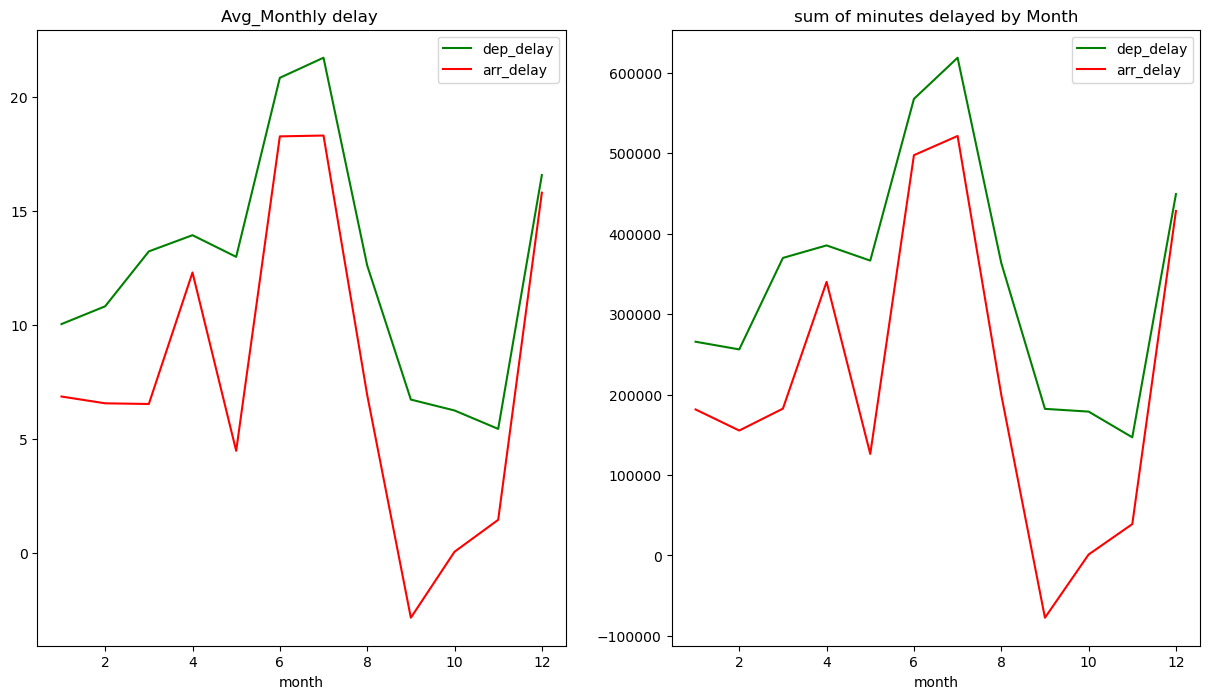

In [34]:
f,ax=plt.subplots(1,2,figsize=(15,8))
avg_by_month.plot(ax=ax[0],color ='g'+'r')
ax[0].set_title('Avg_Monthly delay ')
sum_by_month.plot(ax=ax[1], color ='g'+'r')
ax[1].set_title('sum of minutes delayed by Month')
plt.show()

میانگین بیشترین تاخیر ها در ماه های 6 و 7 است در ماه 9 (سپتامبر ) تاخیر ها کمینه است 

### dep time analysis by carrier and origin

In [35]:
def sns_boxplot(df, x, y_list, fliers):
    fig, axs = plt.subplots( 3 ,int(len(y_list)/3), figsize=(10, 9))
    axs = axs.flatten()

    for i, col in enumerate(y_list):
        sns.boxplot(x=x, y=col, data=df, ax=axs[i], showfliers=fliers)
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45 , fontsize=7)

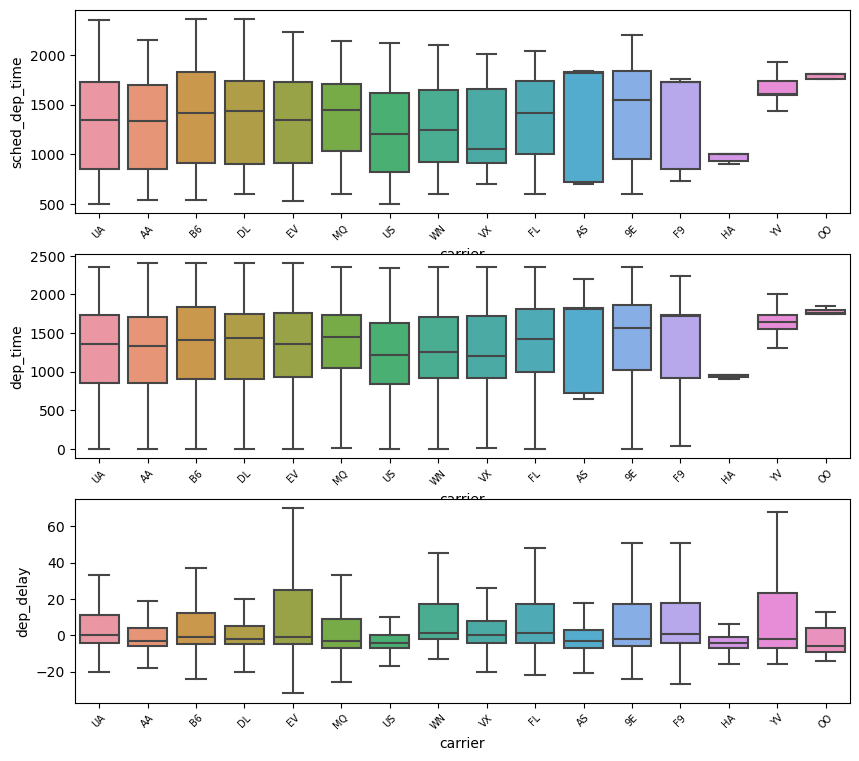

In [36]:
sns_boxplot ( df , "carrier" , ["sched_dep_time" ,"dep_time" , "dep_delay"] , False )

<div style = "direction :rtl ">
بیشنرین انحراف استاندارد برای زمان شروع حرکت مربوط به کریر EV است 
بزرگترین IQR متعلق به AS است  
</div>


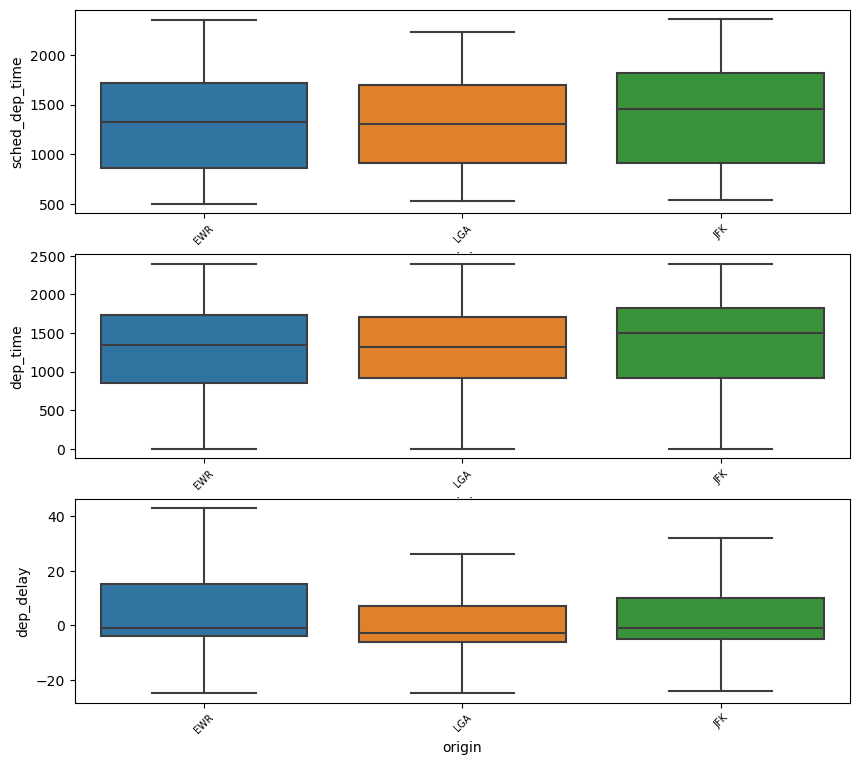

In [37]:
sns_boxplot ( df , "origin" , ["sched_dep_time" ,"dep_time" , "dep_delay"] , False )

<div style = "direction :rtl ">
بالاترین محدوده IQR (از ۹۰۰ تا ۱۸۰۰) به مبدا  JFK تعلق دارد ؛   ۷۵٪ پروازها در زمان   (dep_time)۱۸۰۰ حرکت کرده اند ، میانه داده‌ها برای حرکت ۱۵۰۰ است
</div>


# Relation Ana

## Joint plot

In [28]:
column = ['speed', 'dep_delay', 'arr_delay',"air_time","distance"]
jdf =df[column]

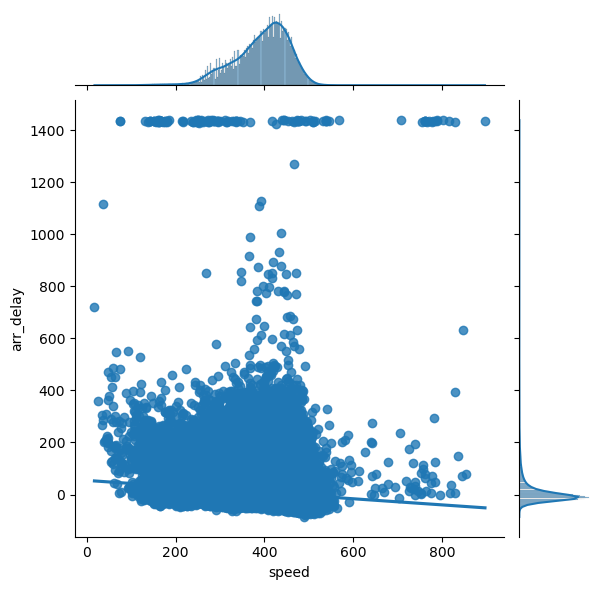

In [72]:
sns.jointplot(x='speed' , y="arr_delay" , data = jdf , kind='reg'  );#, x="speed" , y"arr_delay"   , kind = 'reg'  )

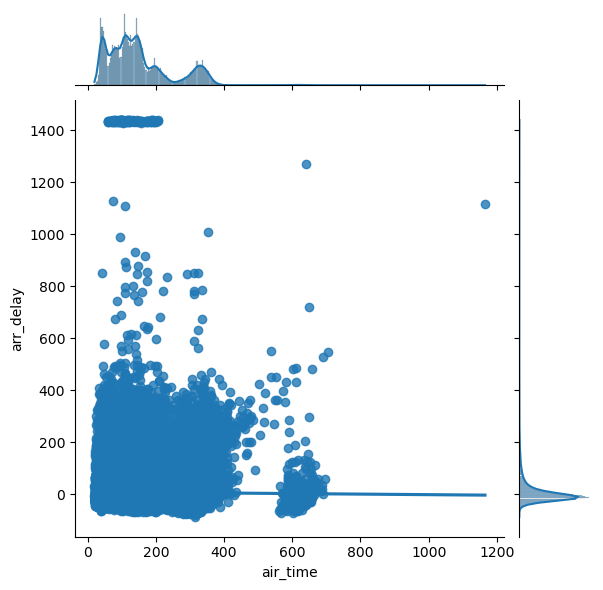

In [30]:
sns.jointplot(x="air_time" , y="arr_delay"  ,data=jdf , kind = 'reg'  )

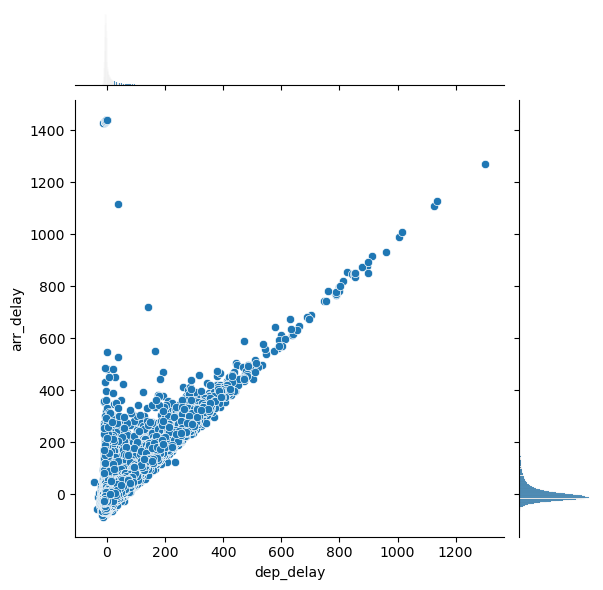

In [29]:
sns.jointplot(x="dep_delay" , y="arr_delay"  ,data=jdf   )

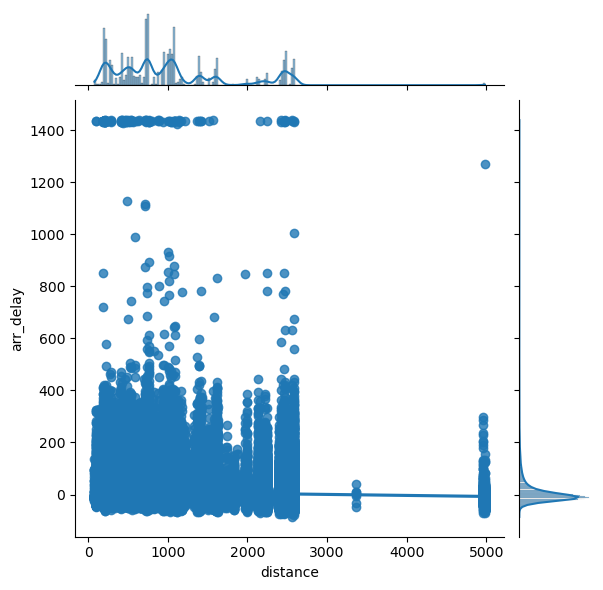

In [32]:
sns.jointplot(x="distance" , y="arr_delay"  ,data=jdf , kind = 'reg'  )

## Heat Map

### Destination and origin analysis

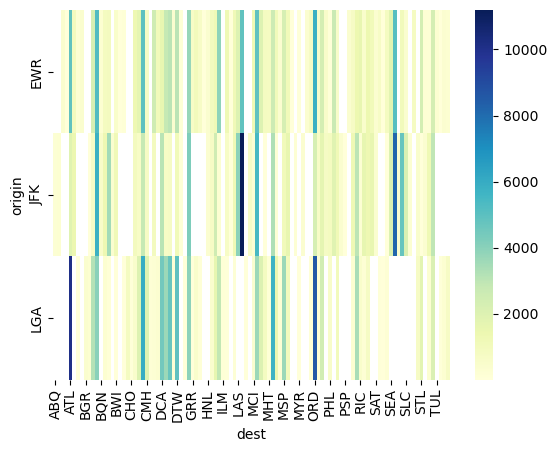

In [31]:
import seaborn as sns
import pandas as pd

# Group the data by origin and destination
dest_flight = df.groupby('origin')['dest'].value_counts()

# Convert the series to a DataFrame
dest_flight_df = dest_flight.reset_index(name='count')

# Pivot the DataFrame to create a matrix of counts
dest_flight_matrix = dest_flight_df.pivot(index='origin', columns='dest', values='count')

# Create a heatmap
sns.heatmap(dest_flight_matrix, cmap='YlGnBu')

# Show the plot
plt.show()

<div style  ="direction :rtl" >
    بیشترین تعداد پرواز ها متعلق به مسیر  JFK به LEX  است
در رده بعدی مسیر LGA به ALT قرار داد
    
</div>    

In [42]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df):
    # Convert non-numeric columns to numeric representations
    df_encoded = pd.get_dummies(df)

    # Compute the correlation matrix
    correlation_matrix = df_encoded.corr()
    print(correlation_matrix)
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Generate the correlation plot using seaborn
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="plasma", square=True, ax=ax);

    # Set the title of the plot
    ax.set_title('Correlation Matrix')
   
    # Display the plot
    plt.show()
 


                sched_dep_time  dep_time  dep_delay  sched_arr_time  arr_time  \
sched_dep_time        1.000000  0.954617   0.198887        0.780683  0.642920   
dep_time              0.954617  1.000000   0.260231        0.784682  0.661163   
dep_delay             0.198887  0.260231   1.000000        0.160488  0.030265   
sched_arr_time        0.780683  0.784682   0.160488        1.000000  0.789193   
arr_time              0.642920  0.661163   0.030265        0.789193  1.000000   
arr_delay             0.142514  0.191221   0.758892        0.109404  0.020273   
air_time             -0.015380 -0.014564  -0.021761        0.078802  0.054191   
speed                -0.023178 -0.028404  -0.008793        0.030810  0.000691   
distance             -0.012687 -0.013998  -0.021671        0.073849  0.046973   

                arr_delay  air_time     speed  distance  
sched_dep_time   0.142514 -0.015380 -0.023178 -0.012687  
dep_time         0.191221 -0.014564 -0.028404 -0.013998  
dep_delay      

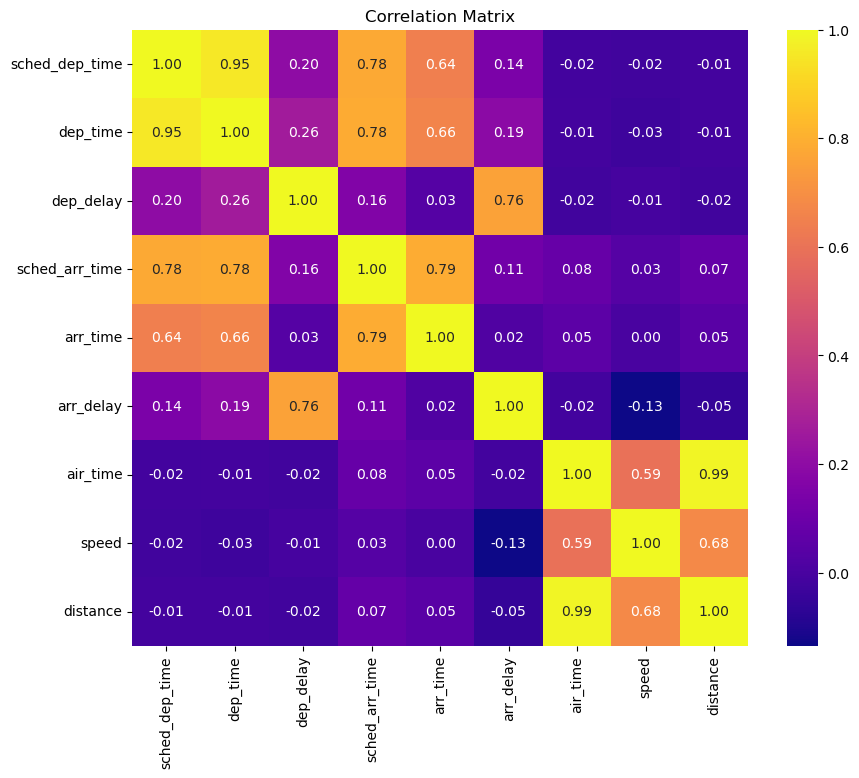

In [43]:
num_df = df.select_dtypes(include=['float' , 'int'])

continuous_df = num_df[[ 'sched_dep_time','dep_time', 'dep_delay','sched_arr_time', 'arr_time',  'arr_delay', 'air_time', 'speed' , 'distance']].copy()
plot_correlation_matrix(continuous_df);

ماتریس همبستگی نشان می‌دهد که تاخیر مبدا و تاخیر در مقصد ارتباط مثبت و قوی دارند. به طور مشابه، زمان پرواز و فاصله پرواز نیز همبیتگی مثبت  دارند. اما همبستگی بین سرعت پرواز، زمان پرواز و فاصله پرواز نیز مثبت است، اما به میزان کافی قوی نیست تا تأثیر قابل توجهی روی یکدیگر داشته باشند.

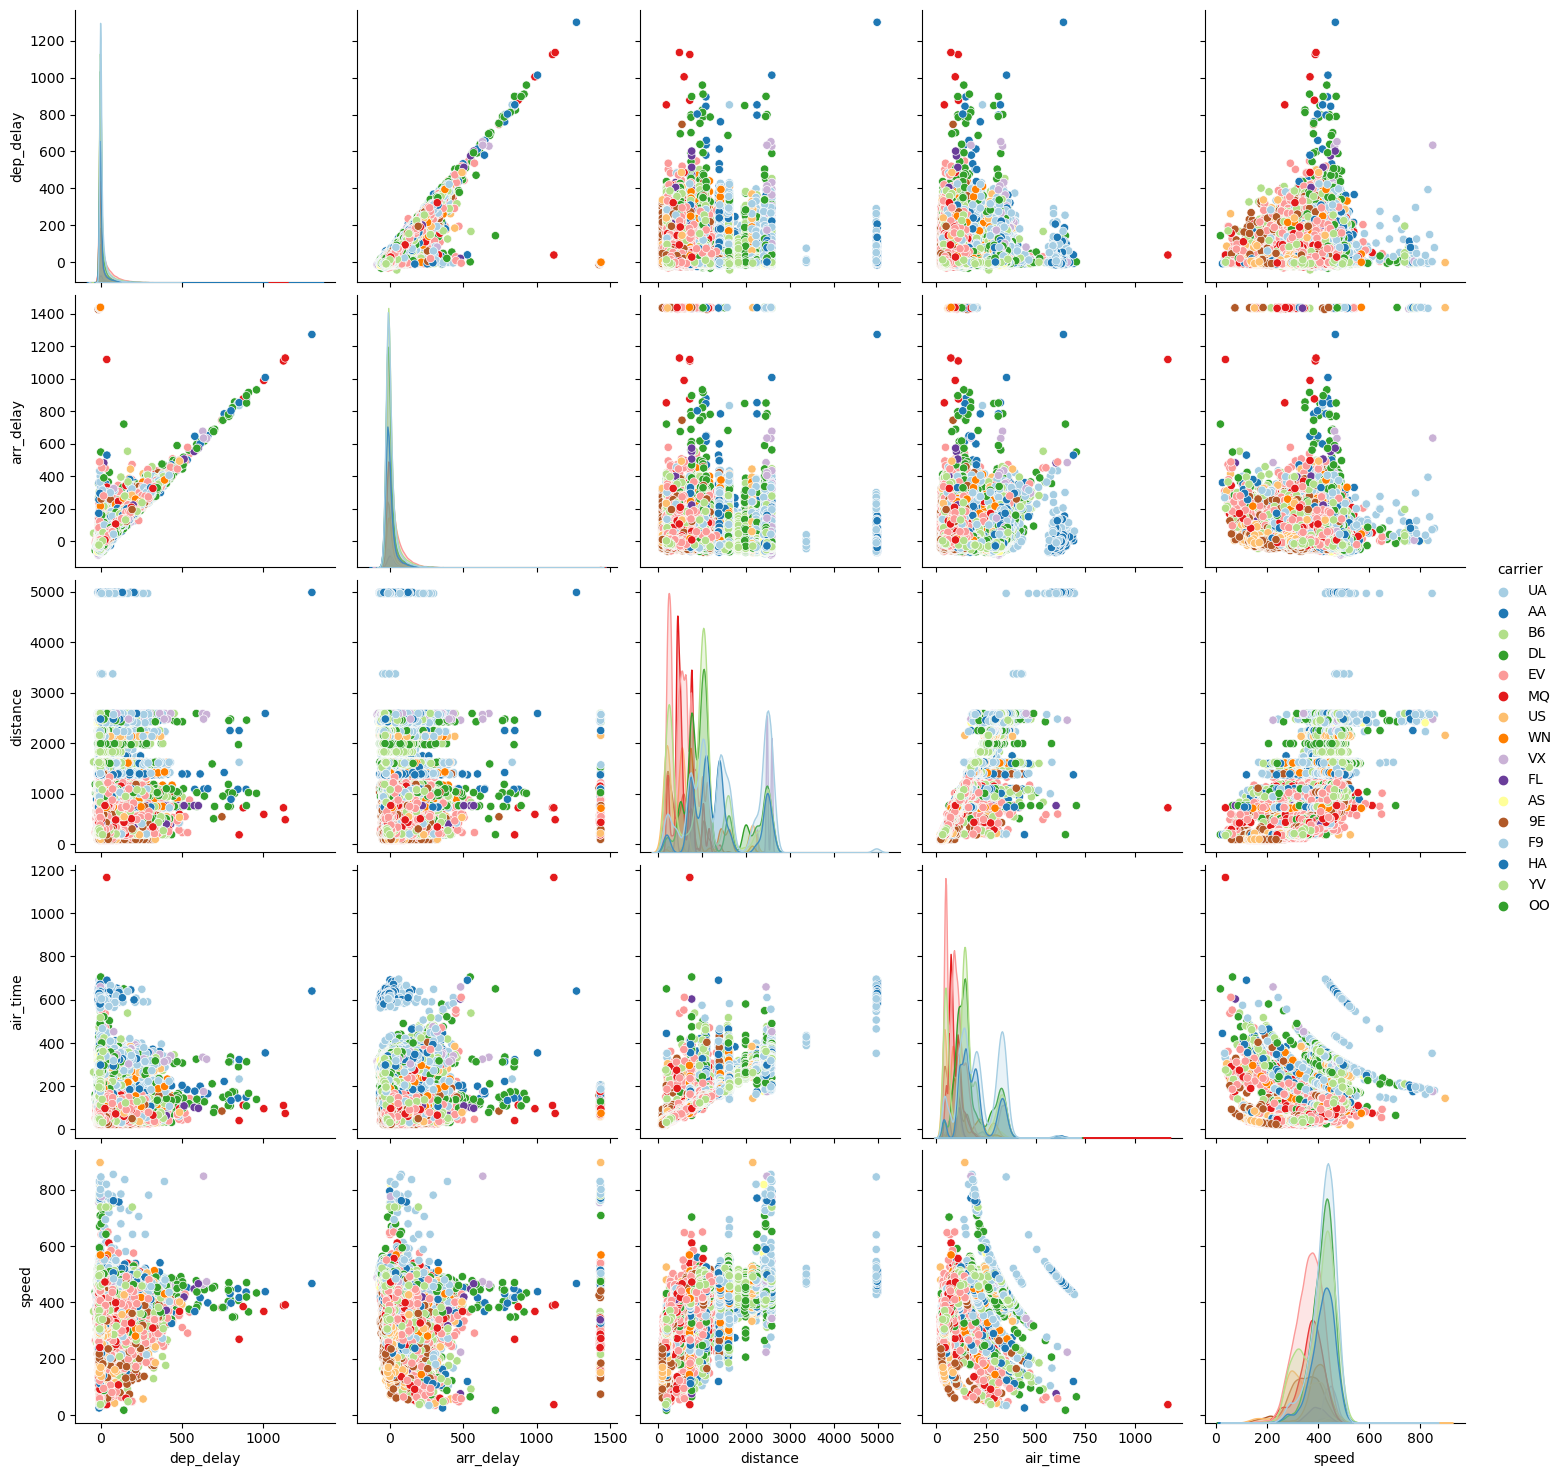

In [25]:
pair_info= sns.pairplot(df, height=3,
                            vars=['dep_delay','arr_delay','distance','air_time','speed'], hue='carrier', palette="Paired")
plt.show(pair_info)

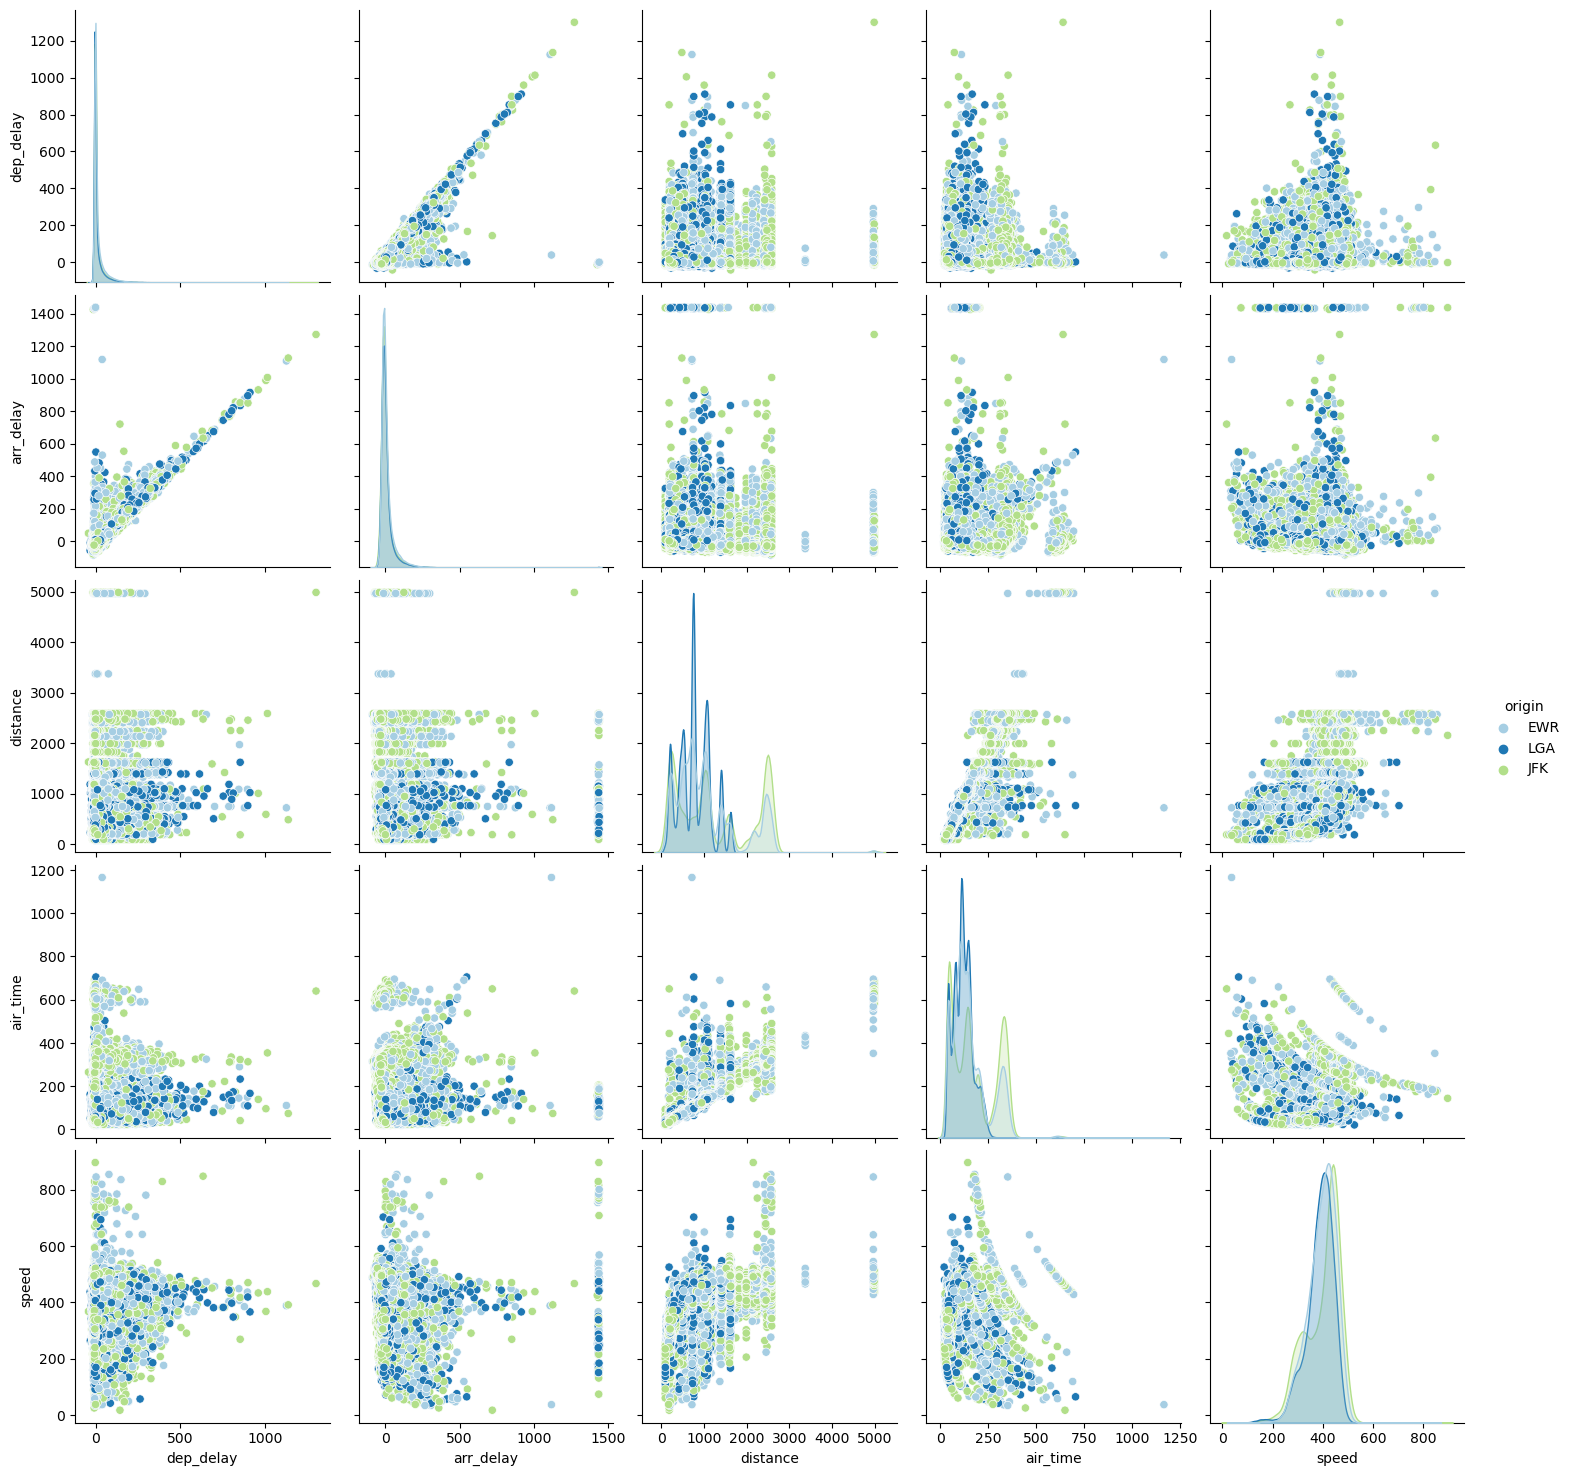

In [26]:
pair_info= sns.pairplot(df, height=3,
                            vars=['dep_delay','arr_delay','distance','air_time','speed'], hue='origin', palette="Paired")
plt.show(pair_info)

# Dashboard

In [33]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

# Create a Dash application
app = dash.Dash(__name__)

# Read the data into a DataFrame
#df = pd.read_csv('flights.csv')


# Find the column with the highest mean
columns =df.columns



# Define the layout of the dashboard
app.layout = html.Div(style={'backgroundColor': 'white'}, children=[
    html.H1('Interactive Dashboard', style={'textAlign': 'center'}),
    

    # Checkbox for column selection
    html.Label('Select a column:'),
    dcc.Checklist(
        id='column-selection',
        options=[{'label': col, 'value': col} for col in columns],
        value=[],
    ),
    
    # Histogram plot
    dcc.Graph(id='histogram-plot'),
    
    # Boxplot plot
    dcc.Graph(id='boxplot-plot'),
    
    # Violin plot
    dcc.Graph(id='violin-plot'),
])

# Callback to update the plots based on column selection
@app.callback(
    [dash.dependencies.Output('histogram-plot', 'figure'),
     dash.dependencies.Output('boxplot-plot', 'figure'),
     dash.dependencies.Output('violin-plot', 'figure')],
    [dash.dependencies.Input('column-selection', 'value')]
)
def update_plots(selected_columns):
    if not selected_columns:
        return {}, {}, {}
    
    figures = {}
    
    for col in selected_columns:
        # Histogram plot
        hist_fig = px.histogram(df, x=col)
        figures['histogram-plot'] = hist_fig
        
        # Boxplot plot
        box_fig = px.box(df, y=col)
        figures['boxplot-plot'] = box_fig
        
        # Violin plot
        violin_fig = px.violin(df, y=col, box=True)
        figures['violin-plot'] = violin_fig
    
    return figures['histogram-plot'], figures['boxplot-plot'], figures['violin-plot']

# Run the application
if __name__ == '__main__':
    app.run_server(debug=True ,port = 8510)


C:\Users\user\AppData\Local\Temp\ipykernel_15644\1332193435.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\user\AppData\Local\Temp\ipykernel_15644\1332193435.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
